In [3]:
#PARTA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_excel("churn_real.xlsx")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
df["Total Charges"]= pd.to_numeric(df["Total Charges"],errors = 'coerce')

In [6]:
print(df['Total Charges'].dtype)

float64


In [7]:
summary = df.describe()  #Get count, mean, std, min, max
summary = summary.drop("count") #remove count from descriptin

styled_summary = summary.style\
    .set_properties(**{
        'text-align': 'center',
        'background-color': '#ADD8E6' # babyblue background
    })\
    .set_table_styles([
        {
            'selector': 'th',
            'props': [
                ('background-color', 'midnightblue'),
                ('color', 'white'),
                ('font-weight', 'bold'),
                ('text-align', 'center')
            ]
        }
    ])

styled_summary

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
mean,1.000000,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.000000,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.000000,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.000000,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.000000,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.000000,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.000000,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


C:\Users\wangu\AppData\Local\Temp\ipykernel_8784\1254173285.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Churn Value', y=col, data=df, palette='Blues', ci=None)
C:\Users\wangu\AppData\Local\Temp\ipykernel_8784\1254173285.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Churn Value', y=col, data=df, palette='Blues', ci=None)
C:\Users\wangu\AppData\Local\Temp\ipykernel_8784\1254173285.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Stayed', 'Churned'])
C:\Users\wangu\AppData\Local\Temp\ipykernel_8784\1254173285.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Churn Value',

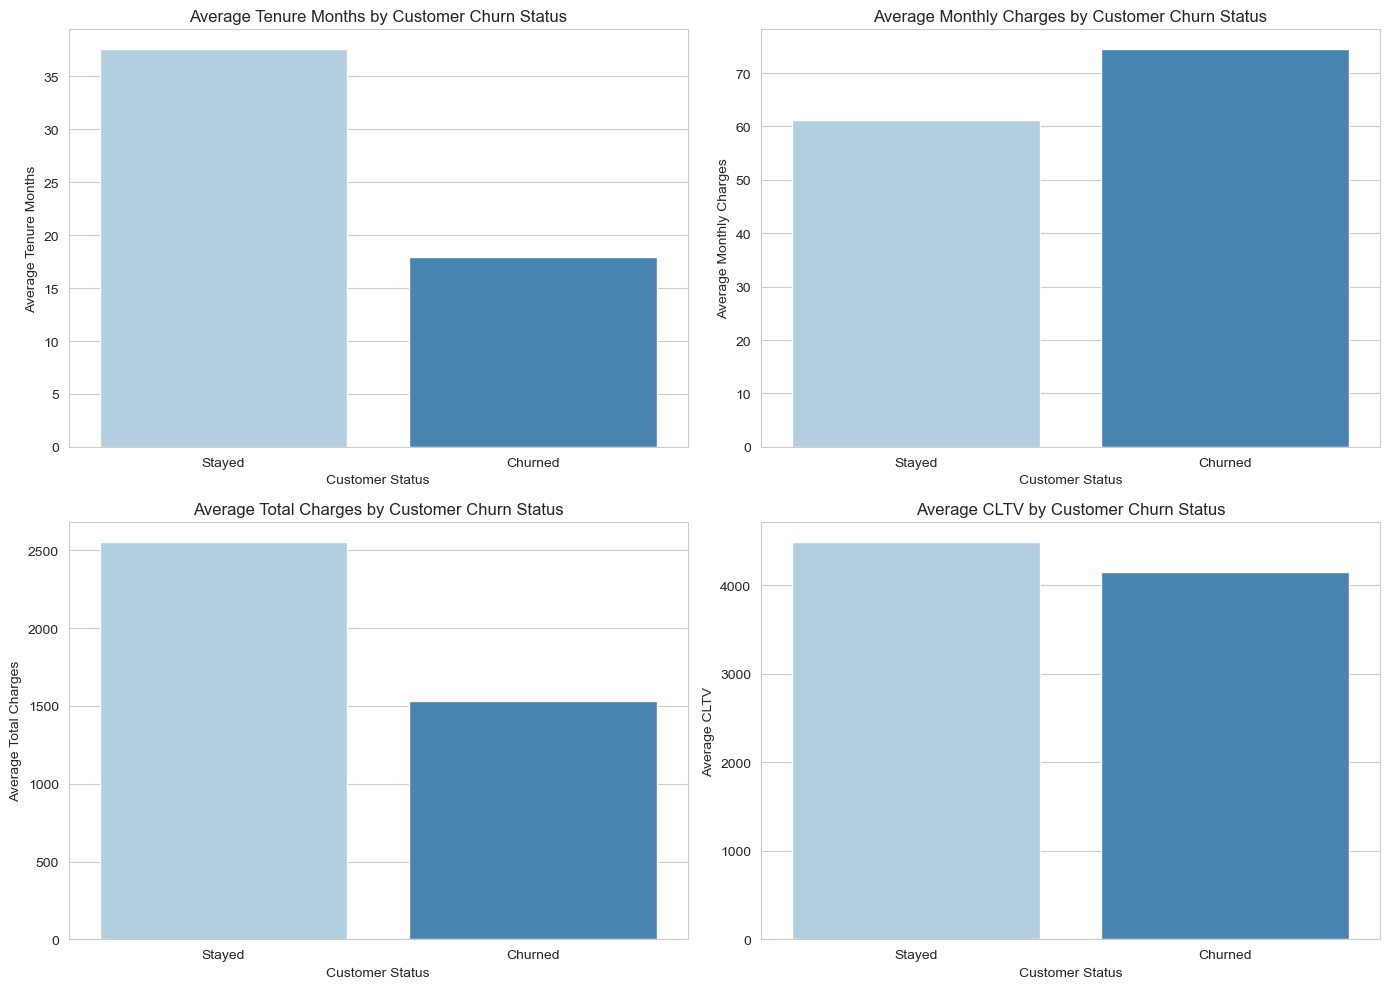

In [8]:
exclude_columns = ["Churn Value", "Latitude", "Longitude", "Churn Score", "Count", "Zip Code"]

# Select only relevant numeric columns
numeric_columns = df.select_dtypes(include='number').columns
relevant_columns = [col for col in numeric_columns if col not in exclude_columns]

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

for i, col in enumerate(relevant_columns):
    plt.subplot(2, 2, i + 1)
    ax = sns.barplot(x='Churn Value', y=col, data=df, palette='Blues', ci=None)
    ax.set_xticklabels(['Stayed', 'Churned'])  
    ax.set_xlabel('Customer Status')  
    ax.set_ylabel(f'Average {col}')  
    plt.title(f'Average {col} by Customer Churn Status')
   
plt.tight_layout()
plt.show()

In [9]:
print("""
#SUMMARY OF VISUALIZATIONS

TUNURE MONTHS= From this chart we see that those who churned used the service for a short period of time churned but those who are old and loyal customers are still there

MONTHLY CHARGES= From the average monthly charges by customer churn statuses there is a slight difference between the stayed and churned customers where the churned customers were charged more than those who stay this show us that customers who are charged more are more likely to churn.

TOTAL CHARGES=From the average total charges graph we see that the stayed bar is higher that the churned this is because the churned customers left before they could accumulate more charges.

AVERAGE CLTVFrom this chart we can see that both churned and customers who stayed contributed to the company's revenue but however it shows that the loyal customers who stayed contributed and still are contributing more to the company's revenue.

This suggests the company should focus on improving early-stage customer experience, reassessing pricing models, and increasing long-term value.
""")



#SUMMARY OF VISUALIZATIONS

TUNURE MONTHS= From this chart we see that those who churned used the service for a short period of time churned but those who are old and loyal customers are still there

MONTHLY CHARGES= From the average monthly charges by customer churn statuses there is a slight difference between the stayed and churned customers where the churned customers were charged more than those who stay this show us that customers who are charged more are more likely to churn.

TOTAL CHARGES=From the average total charges graph we see that the stayed bar is higher that the churned this is because the churned customers left before they could accumulate more charges.

AVERAGE CLTVFrom this chart we can see that both churned and customers who stayed contributed to the company's revenue but however it shows that the loyal customers who stayed contributed and still are contributing more to the company's revenue.

This suggests the company should focus on improving early-stage custome

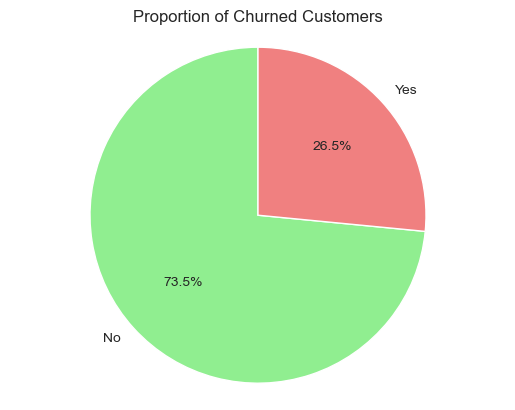

In [10]:
# Pie chart 
churn_counts = df['Churn Label'].value_counts()

plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Proportion of Churned Customers')
plt.axis('equal')
plt.show()


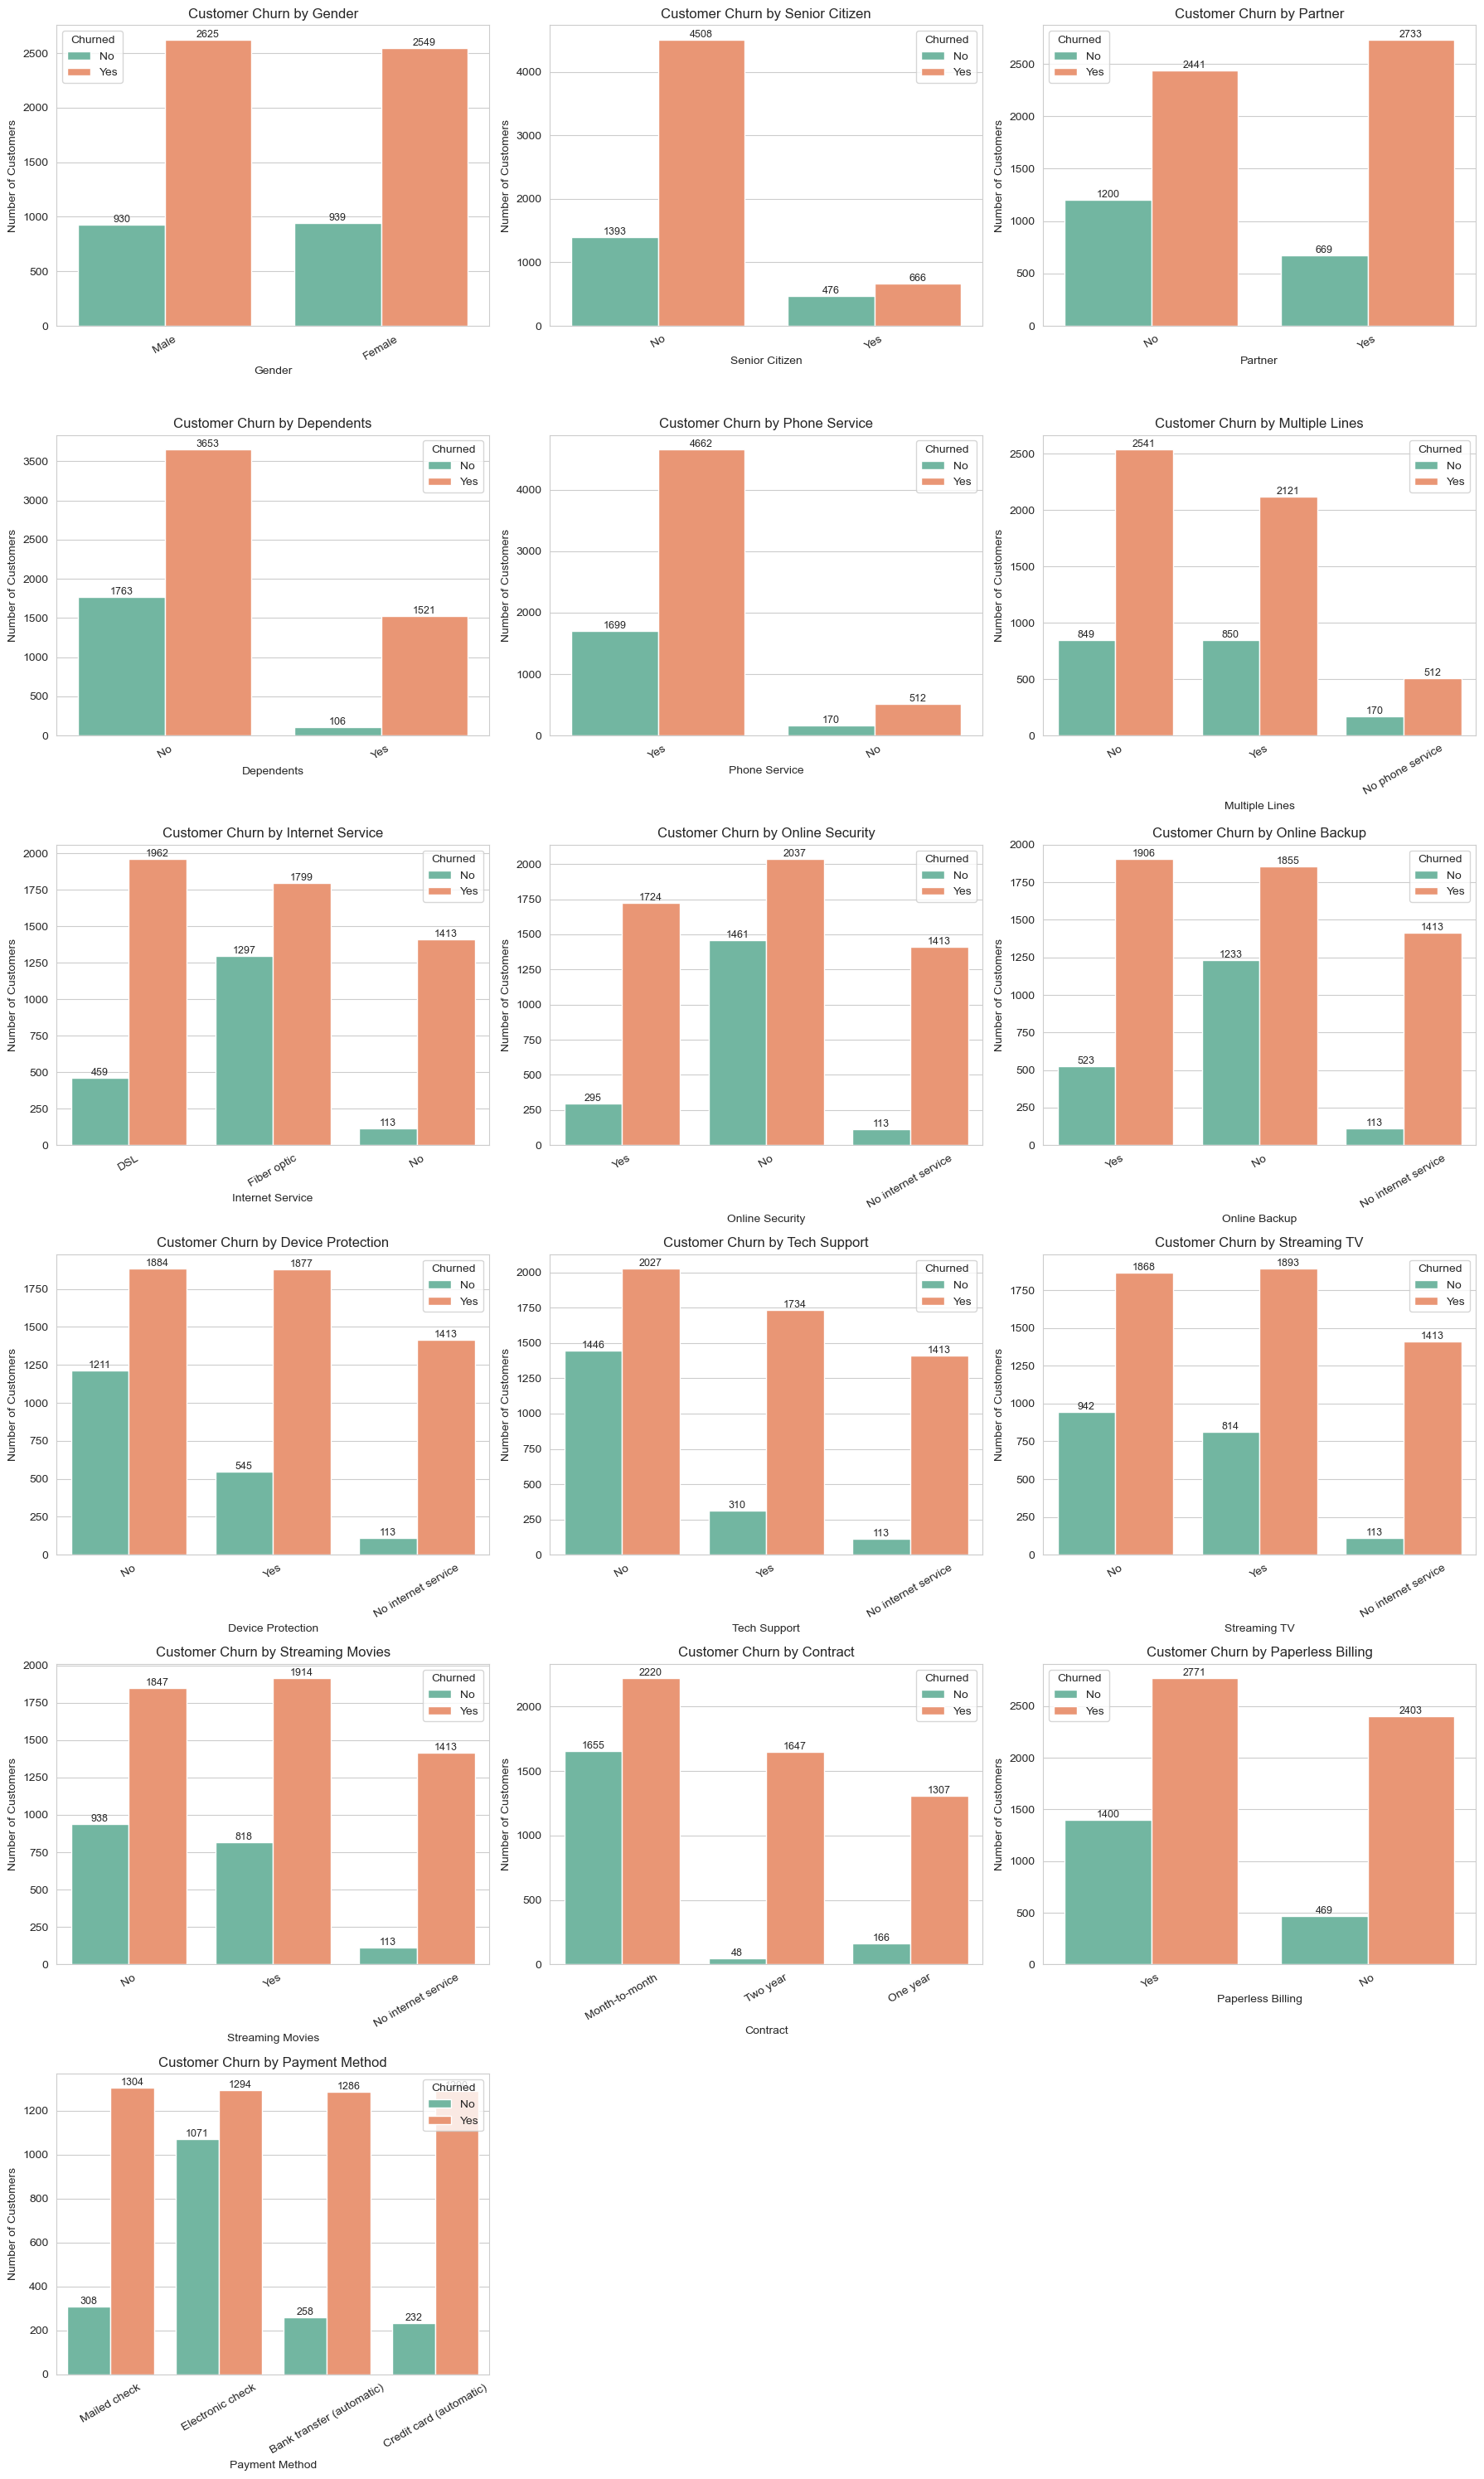

In [11]:
categorical_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
                    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                    'Contract', 'Paperless Billing', 'Payment Method']

# Set up the grid layout (adjust depending on how many categorical columns you have)
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Set the figure size
plt.figure(figsize=(18, n_rows * 5))

# Loop through each categorical column to create a countplot
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.countplot(data=df, x=col, hue='Churn Label', palette='Set2')

    # Add count labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=9)

    plt.title(f'Customer Churn by {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=30)
    plt.legend(title='Churned', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


In [12]:
churn_reason_counts = df['Churn Reason'].value_counts()
churn_reason_percentage = (churn_reason_counts / churn_reason_counts.sum()) * 100

churn_reason_summary = pd.DataFrame({
    'Count': churn_reason_counts,
    'Percentage': churn_reason_percentage
})

churn_reason_summary


,Count,Percentage
Churn Reason,,
Attitude of support person,192,10.272873
Competitor offered higher download speeds,189,10.112360
Competitor offered more data,162,8.667737
Don't know,154,8.239700
Competitor made better offer,140,7.490637
Attitude of service provider,135,7.223114
Competitor had better devices,130,6.955591
Network reliability,103,5.510968
Product dissatisfaction,102,5.457464


In [13]:
print("""
ATTITUDE OF SUPPORT PERSON= A significant number of customers (192) left because of the poor service and interaction with the staff ,meaning that rudenss,lack of patience and unhelpfulness is a major problem that the support staff has.To solve this regular staff workshops could be put in place to teach and educate the staff on proper customer service,as well as implementing feedback systems for customers to monitor the customer supoort quality

COMPETITOR OFFERED HIGHER DOWNLOAD SPEEDS= 189 customers churned due to this reason ,this shows that the performance of the telecommunications company is poor.This problem can be mitigaed by introducing new speed bundles to match the competitors. Upgrading the network infrastructures to also match the competitors can also help solve this problem.

COMPETITOR OFFERED MORE DATA = 162 customers churned because the competitors offered more data suggesting that the data provided by the telecommunications company is not meeting the customers preferences as compared to the competitors.Introducing bonus bundles or free off-peak data can help keep cutomers from churning as well as educating customers on data saving tips to help them use the data wisely.
""")


ATTITUDE OF SUPPORT PERSON= A significant number of customers (192) left because of the poor service and interaction with the staff ,meaning that rudenss,lack of patience and unhelpfulness is a major problem that the support staff has.To solve this regular staff workshops could be put in place to teach and educate the staff on proper customer service,as well as implementing feedback systems for customers to monitor the customer supoort quality

COMPETITOR OFFERED HIGHER DOWNLOAD SPEEDS= 189 customers churned due to this reason ,this shows that the performance of the telecommunications company is poor.This problem can be mitigaed by introducing new speed bundles to match the competitors. Upgrading the network infrastructures to also match the competitors can also help solve this problem.

COMPETITOR OFFERED MORE DATA = 162 customers churned because the competitors offered more data suggesting that the data provided by the telecommunications company is not meeting the customers preferen

In [14]:
#PART B 

missing_values = df.isnull().sum()
print(missing_values)

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [15]:
mode_value = df['Total Charges'].mode()[0]
df['Total Charges'].fillna(mode_value)
print(df['Total Charges'])
df['Total Charges'].isnull().sum()


missing_values = df.isnull().sum()
print(missing_values)

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64
CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value         


Skewness of numeric columns:


Total Charges      0.961642
Tenure Months      0.239540
Count              0.000000
Monthly Charges   -0.220524
Zip Code          -0.251463
CLTV              -0.311602
dtype: float64

C:\Users\wangu\AppData\Local\Temp\ipykernel_8784\3673561827.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='Churn Label', fill=True, common_norm=False)


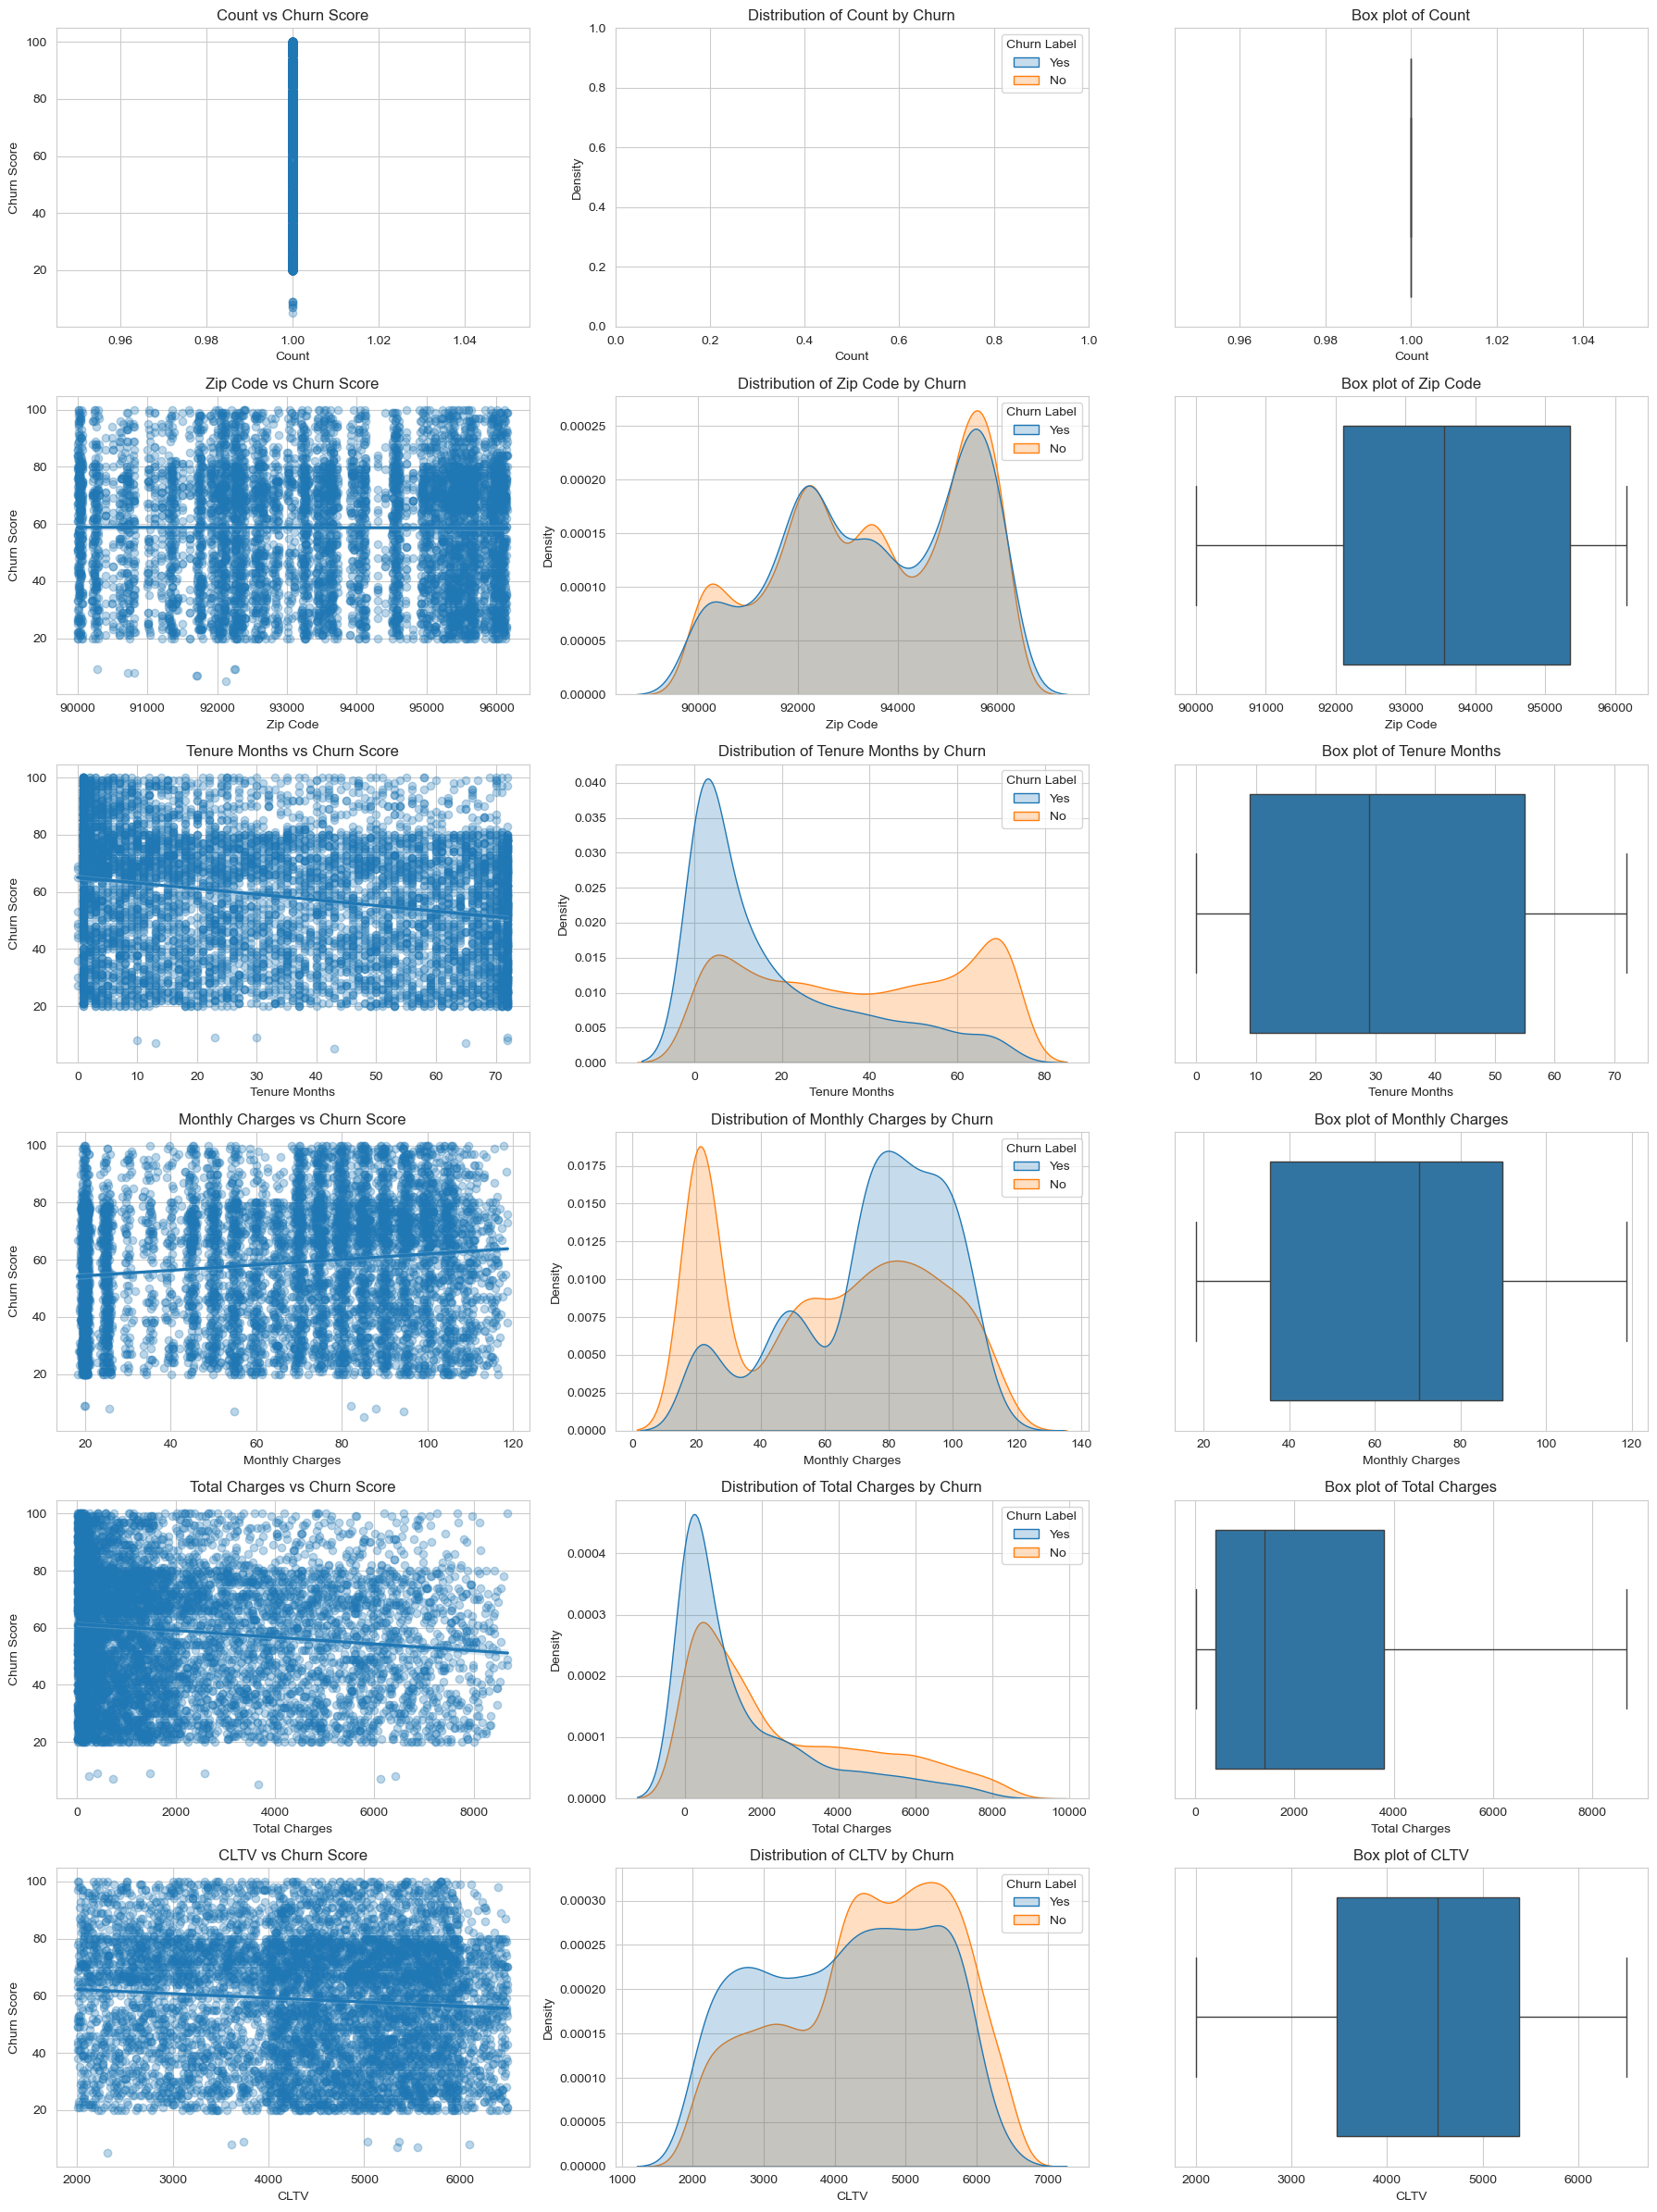

In [16]:
#identify numeric columns to analyze
exclude_cols = ['Latitude', 'Longitude', 'Churn Value', 'Churn Score']
numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in exclude_cols]

# Calculate skewness
skewness = df[numeric_cols].skew().sort_values(ascending=False)
print("\nSkewness of numeric columns:")
display(skewness)

# Set up figure for visualizations
plt.figure(figsize=(18, 24))

# Create regression plots, KDE plots, and box plots for each numeric column
for i, col in enumerate(numeric_cols):
    # Regression plot (relationship with Churn Score)
    plt.subplot(len(numeric_cols), 3, 3*i+1)
    sns.regplot(data=df, x=col, y='Churn Score', scatter_kws={'alpha':0.3})
    plt.title(f'{col} vs Churn Score')
    
    # KDE plot (distribution by Churn Label)
    plt.subplot(len(numeric_cols), 3, 3*i+2)
    sns.kdeplot(data=df, x=col, hue='Churn Label', fill=True, common_norm=False)
    plt.title(f'Distribution of {col} by Churn')
    
    # Box plot (spread and outliers)
    plt.subplot(len(numeric_cols), 3, 3*i+3)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

In [17]:
# d) Identify outliers from the box plots
print("""
outliers visible in the box plots:

1. Monthly Charges: Some customers have unusually high monthly charges (right side of the box plot)
2. Tenure Months: A few customers have very short tenure (left side of the box plot)
3. CLTV: Some customers show extremely high lifetime values (right side of the box plot)
""")


outliers visible in the box plots:

1. Monthly Charges: Some customers have unusually high monthly charges (right side of the box plot)
2. Tenure Months: A few customers have very short tenure (left side of the box plot)
3. CLTV: Some customers show extremely high lifetime values (right side of the box plot)




Columns requiring skewness improvement: ['Total Charges']

Total Charges:
Original skewness: 0.96
After log transformation: -0.74


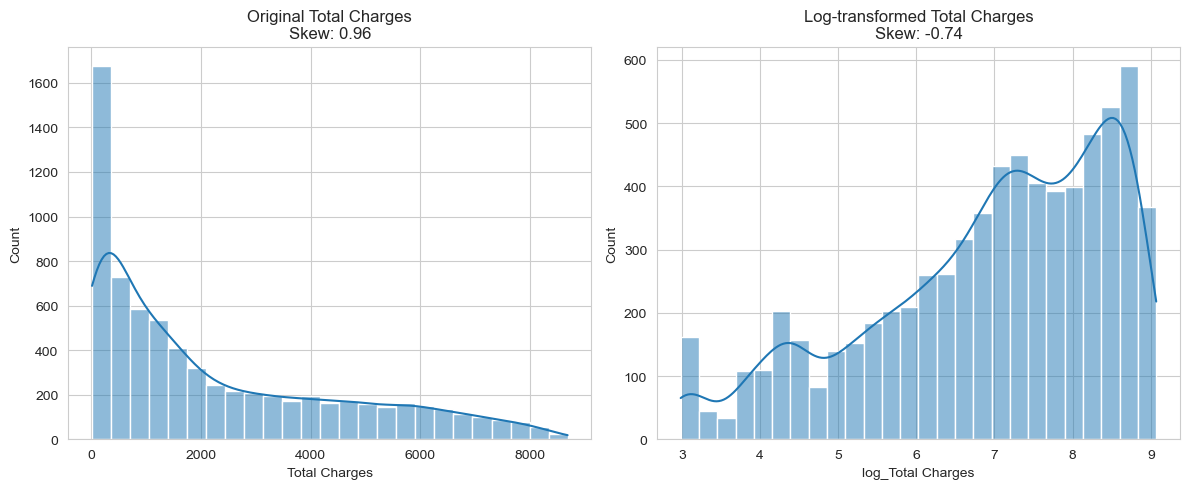

In [18]:
# Identify columns needing transformation
skewed_cols = skewness[abs(skewness) > 0.8].index

print("\nColumns requiring skewness improvement:", list(skewed_cols))

for col in skewed_cols:
    # Before transformation
    original_skew = df[col].skew()
    
    # Apply log transformation (adding 1 to avoid log(0))
    df[f'log_{col}'] = np.log1p(df[col])
    
    # After transformation
    new_skew = df[f'log_{col}'].skew()
    
    print(f"\n{col}:")
    print(f"Original skewness: {original_skew:.2f}")
    print(f"After log transformation: {new_skew:.2f}")
    
    # Plot comparison
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Original {col}\nSkew: {original_skew:.2f}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[f'log_{col}'], kde=True)
    plt.title(f'Log-transformed {col}\nSkew: {new_skew:.2f}')
    
    plt.tight_layout()
    plt.show()


In [19]:
#PART C 

from scipy.stats import chi2_contingency

print("Hypothesis Test 1: Phone Service vs Churn")
contingency_table = pd.crosstab(df['Phone Service'], df['Churn Value'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nContingency Table:")
display(contingency_table)
print(f"\nChi-square test statistic: {chi2:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("\nConclusion: Reject the null hypothesis - There is a significant relationship between Phone Service and Churn")
else:
    print("\nConclusion: Fail to reject the null hypothesis - No significant relationship found")

# ii) Contract Type vs Churn
print("\n\nHypothesis Test 2: Contract Type vs Churn")
contingency_table = pd.crosstab(df['Contract'], df['Churn Value'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nContingency Table:")
display(contingency_table)
print(f"\nChi-square test statistic: {chi2:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("\nConclusion: Reject the null hypothesis - Contract type significantly influences churn")
else:
    print("\nConclusion: Fail to reject the null hypothesis - No significant influence found")
# iii) Senior Citizen vs Churn
print("\n\nHypothesis Test 3: Senior Citizen vs Churn")
contingency_table = pd.crosstab(df['Senior Citizen'], df['Churn Value'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nContingency Table:")
display(contingency_table)
print(f"\nChi-square test statistic: {chi2:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("\nConclusion: Reject the null hypothesis - Senior Citizen status significantly influences churn")
else:
    print("\nConclusion: Fail to reject the null hypothesis - No significant influence found")


Hypothesis Test 1: Phone Service vs Churn

Contingency Table:


Churn Value,0,1
Phone Service,,
No,512,170
Yes,4662,1699



Chi-square test statistic: 0.915
P-value: 0.3388

Conclusion: Fail to reject the null hypothesis - No significant relationship found


Hypothesis Test 2: Contract Type vs Churn

Contingency Table:


Churn Value,0,1
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48



Chi-square test statistic: 1184.597
P-value: 0.0000

Conclusion: Reject the null hypothesis - Contract type significantly influences churn


Hypothesis Test 3: Senior Citizen vs Churn

Contingency Table:


Churn Value,0,1
Senior Citizen,,
No,4508,1393
Yes,666,476



Chi-square test statistic: 159.426
P-value: 0.0000

Conclusion: Reject the null hypothesis - Senior Citizen status significantly influences churn


In [20]:
# b) Management conclusions from hypothesis tests
print("""
Management Conclusions:

1. Phone Service:
   - The test shows no significant relationship between the phone service and  churn.
  
2. Contract Type:
   - The test shows contract type  significantly affect churn.
   - Action: focus on converting customers to longer-term contracts that align with customer preference

3. Senior Citizen:
   - The test shows senior status significantly influence churn.
   - Action: develop senior-specific retention programs

General Recommendations:
- Focus retention efforts on the factors showing significant relationships with churn
- Monitor these key factors regularly to detect changes in customer behavior
- Develop targeted interventions based on the specific needs of different customer segments
""")


Management Conclusions:

1. Phone Service:
   - The test shows no significant relationship between the phone service and  churn.
  
2. Contract Type:
   - The test shows contract type  significantly affect churn.
   - Action: focus on converting customers to longer-term contracts that align with customer preference

3. Senior Citizen:
   - The test shows senior status significantly influence churn.
   - Action: develop senior-specific retention programs

General Recommendations:
- Focus retention efforts on the factors showing significant relationships with churn
- Monitor these key factors regularly to detect changes in customer behavior
- Develop targeted interventions based on the specific needs of different customer segments



In [21]:
#PART D 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# a) Perform data normalization on specific columns
# Select columns to normalize
cols_to_normalize = ['Tenure Months', 'Monthly Charges', 'Total Charges']

# Initialize the scaler
scaler = MinMaxScaler()

# Before normalization
print("Before normalization - Sample data:")
display(df[cols_to_normalize].head())

# Apply normalization
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# After normalization
print("\nAfter normalization - Sample data:")
display(df[cols_to_normalize].head())



Before normalization - Sample data:


,Tenure Months,Monthly Charges,Total Charges
0,2,53.85,108.15
1,2,70.70,151.65
2,8,99.65,820.50
3,28,104.80,3046.05
4,49,103.70,5036.30



After normalization - Sample data:


,Tenure Months,Monthly Charges,Total Charges
0,0.027778,0.354229,0.010310
1,0.027778,0.521891,0.015330
2,0.111111,0.809950,0.092511
3,0.388889,0.861194,0.349325
4,0.680556,0.850249,0.578987


In [22]:
# b) Split the dataset into training and test sets
# First, prepare features (X) and target (y)
# We'll use the normalized numeric features and encode categorical ones
X = pd.get_dummies(df.drop(['Churn Value', 'Churn Label'], axis=1), drop_first=True)
y = df['Churn Value']

# Split with 80% training, 20% testing (common practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")




Training set size: 5634 samples
Test set size: 1409 samples


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Initialize and train model with imputation
logreg_model = make_pipeline(
    SimpleImputer(strategy='mean'),  # Handle missing values
    LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='liblinear',
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    )
)

logreg_model.fit(X_train, y_train)

# Print model parameters
print("Model trained successfully with imputation for missing values")
print("Logistic Regression parameters:")
print(f"- Regularization: {logreg_model.named_steps['logisticregression'].penalty}")
print(f"- C value: {logreg_model.named_steps['logisticregression'].C}")
print(f"- Solver: {logreg_model.named_steps['logisticregression'].solver}")
print(f"- Max iterations: {logreg_model.named_steps['logisticregression'].max_iter}")

Model trained successfully with imputation for missing values
Logistic Regression parameters:
- Regularization: l2
- C value: 1.0
- Solver: liblinear
- Max iterations: 1000


In [24]:
# D) Print classification report

from sklearn.metrics import classification_report

# Generate predictions
y_pred = logreg_model.predict(X_test)

# Print classification report
print("\nD) Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churn', 'Churn']))
 


D) Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.99      0.98      0.99      1009
       Churn       0.95      0.98      0.96       400

    accuracy                           0.98      1409
   macro avg       0.97      0.98      0.97      1409
weighted avg       0.98      0.98      0.98      1409



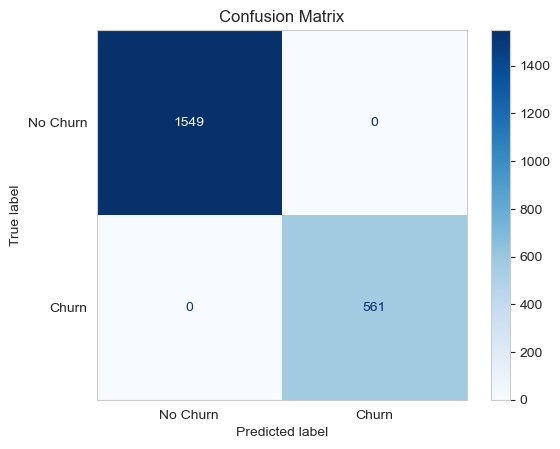

In [32]:
#E) Generate and print confusion matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay


# Convert 'Total Charges' to numeric and drop rows with NaNs
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df = df.dropna(subset=['Total Charges'])

# Define features and target
X = df.drop('Churn Label', axis=1)  # Replace if the column name is different
y = df['Churn Label']

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Full pipeline with Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        solver='liblinear', C=1.0, random_state=42
    ))
])

# Train the model
pipeline.fit(X_train, y_train)

# Plot confusion matrix only
ConfusionMatrixDisplay.from_estimator(
    pipeline,
    X_test,
    y_test,
    display_labels=["No Churn", "Churn"],
    cmap=plt.cm.Blues,
    values_format='d'
)

plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
# F) Interpret the confusion matrix
tn, fp, fn, tp = cm.ravel()
total = tn + fp + fn + tp

print("\nF) Confusion Matrix Interpretation:")
print(f"True Negatives (Correct non-churn): {tn} ({tn/total:.1%})")
print(f"False Positives (Wrong churn prediction): {fp} ({fp/total:.1%})")
print(f"False Negatives (Missed churns): {fn} ({fn/total:.1%})")
print(f"True Positives (Correct churn predictions): {tp} ({tp/total:.1%})")

# Calculate key metrics
accuracy = (tp + tn) / total
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\nKey Performance Metrics:")
print(f"Accuracy: {accuracy:.1%}")
print(f"Precision: {precision:.1%}")
print(f"Recall/Sensitivity: {recall:.1%}")
print(f"F1 Score: {f1:.1%}")

print("\nBusiness Insights:")
print(f"- The model correctly identifies {recall:.1%} of actual churn cases")
print(f"- When predicting churn, it's correct {precision:.1%} of the time")
print(f"- Most critical errors: {fn} missed churns ({fn/total:.1%} of cases)") 